In [1]:
import os
import pandas as pd
import re

base_dir = r"C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\sLoreta_1000ms_v2"

condiciones = {
    "congruente": "PWI_Average_Congruente-sLorRoi.txt",
    "incongruente_rel": "PWI_Average_Incongruente_rel-sLorRoi.txt",
    "incongruente_no_rel": "PWI_Average_Incongruente_no_rel-sLorRoi.txt"
}


Datos_ = {"congruente": {}, "incongruente_rel": {}, "incongruente_no_rel": {}}


for sujeto_id in range(1, 41):
    for condicion, sufijo_archivo in condiciones.items():
        sujeto = f"Sujeto_{sujeto_id}"
        file_name = f"Sujeto_{sujeto_id}_{sufijo_archivo}"
        file_path = os.path.join(base_dir, file_name)
        print(file_name)

        print(file_path)

        try:
            # Verifica si el archivo existe
            if os.path.exists(file_path):
                # Leer el archivo línea por línea, eliminando espacios adicionales
                with open(file_path, "r") as file:
                    lines = file.readlines()
                
                # Procesar las líneas en forma de DataFrame
                data = [list(map(float, line.split())) for line in lines if line.strip()]
                df = pd.DataFrame(data)
                
                # Guardar en el diccionario directamente por sujeto
                if sujeto not in Datos_[condicion]:
                    Datos_[condicion][sujeto] = df
                print(f"{file_name} cargado exitosamente en '{condicion}'.")
            else:
                # Si el archivo no existe, almacena None
                Datos_[condicion][sujeto] = None
                print(f"{file_name} no encontrado en '{condicion}'.")
        except Exception as e:
            # Maneja errores inesperados
            Datos_[condicion][sujeto] = None
            print(f"Error al cargar {file_name} en '{condicion}': {e}")

# Resumen de las cargas
print("\nResumen de las cargas:")
for condicion, sujetos_data in Datos_.items():
    print(f"\nCondición: {condicion}")
    for sujeto, data in sujetos_data.items():
        status = "Cargado" if data is not None else "No cargado"
        print(f"  {sujeto}: {status}")


Sujeto_1_PWI_Average_Congruente-sLorRoi.txt
C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\sLoreta_1000ms_v2\Sujeto_1_PWI_Average_Congruente-sLorRoi.txt
Sujeto_1_PWI_Average_Congruente-sLorRoi.txt cargado exitosamente en 'congruente'.
Sujeto_1_PWI_Average_Incongruente_rel-sLorRoi.txt
C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\sLoreta_1000ms_v2\Sujeto_1_PWI_Average_Incongruente_rel-sLorRoi.txt
Sujeto_1_PWI_Average_Incongruente_rel-sLorRoi.txt cargado exitosamente en 'incongruente_rel'.
Sujeto_1_PWI_Average_Incongruente_no_rel-sLorRoi.txt
C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\sLoreta_1000ms_v2\Sujeto_1_PWI_Average_Incongruente_no_rel-sLorRoi.txt
Sujeto_1_PWI_Average_Incongruente_no_rel-sLorRoi.txt cargado exitosamente en 'incongruente_no_rel'.
Sujeto_2_PWI_Average_Congruente-sLorRoi.txt
C:\Users\Usuario\Documents\Datos EEG\PWI_DATOS_EEG_PROCESADOS_BUENOS\sLoreta_1000ms_v2\Sujeto_2_PWI_Average_Congruente-sLorRo

In [2]:
import pandas as pd

# Ruta del archivo con nombres de regiones
path = r"C:/Users/Usuario/Documents/FelipeCarriel/EEG_ERP_Analysis/LORETA_files"
file_path = f"{path}/AAL_eeg-ROInames.txt"

# Leer y procesar el archivo de nombres de regiones
with open(file_path, "r") as file:
    lines = file.readlines()

# Crear el diccionario para mapear números a nombres de regiones
region_mapping = {}
for line in lines:
    if line.strip():  # Evitar líneas vacías
        number, region = line.split("-", 1)
        region_mapping[int(number) - 1] = region.strip()  # Restar 1 para índices 0-based

# Actualizar los DataFrames en el diccionario Datos con los nombres de las ROI
for condicion, sujetos in Datos_.items():
    for sujeto_id, df in sujetos.items():  # Ahora los datos están directamente bajo `sujeto_id`
        if isinstance(df, pd.DataFrame):  # Asegurar que sea un DataFrame
            df.rename(columns=region_mapping, inplace=True)

# Opcional: Imprimir un ejemplo para verificar
condicion_ejemplo = "congruente"
sujeto_ejemplo = "Sujeto_10"
print(Datos_[condicion_ejemplo][sujeto_ejemplo].head())


   Precentral_L  Precentral_R  Frontal_Sup_L  Frontal_Sup_R  \
0      0.006987      0.004939       0.004830       0.008663   
1      0.006496      0.005221       0.005362       0.009834   
2      0.005899      0.005510       0.005920       0.010724   
3      0.005395      0.005751       0.006518       0.011310   
4      0.005278      0.005929       0.007234       0.011676   

   Frontal_Sup_Orb_L  Frontal_Sup_Orb_R  Frontal_Mid_L  Frontal_Mid_R  \
0           0.003338           0.001160       0.002707       0.006610   
1           0.003451           0.001387       0.002936       0.007539   
2           0.003621           0.001686       0.003291       0.008154   
3           0.003792           0.001994       0.003736       0.008373   
4           0.003913           0.002252       0.004291       0.008209   

   Frontal_Mid_Orb_L  Frontal_Mid_Orb_R  ...  Temporal_Sup_L  Temporal_Sup_R  \
0           0.006805           0.000879  ...        0.007478        0.007269   
1           0.007065  

In [3]:
import numpy as np
import mne

def escalar_minmax_personalizado(datos, min_abs, max_abs):
    # Escalar valores entre -1 y 1 usando el máximo absoluto
    return datos / max_abs

def calcular_minmax_scaler_registros_eeg(registros_eeg):
    
    registros_eeg_minmax = {"congruente": {}, "incongruente_rel": {}, "incongruente_no_rel": {}}

    for sujeto in registros_eeg["congruente"]:  # Iterar sobre sujetos
        if registros_eeg["congruente"][sujeto] is None:
            # Si el sujeto fue excluido, mantenerlo como None en todos los casos
            for cond in registros_eeg_minmax:
                registros_eeg_minmax[cond][sujeto] = None
            continue

        # Obtener datos de la condición congruente
        datos_congruente = registros_eeg["congruente"][sujeto]  # (Canales x Tiempos)

        # Calcular máximo absoluto por canal para escalar entre -1 y 1
        max_abs_congruente = np.max(np.abs(datos_congruente), axis=0)
        max_abs_congruente[max_abs_congruente == 0] = 1  # Evitar divisiones por cero

        # Normalizar todas las condiciones respecto a la condición congruente
        for condicion in registros_eeg:
            if registros_eeg[condicion][sujeto] is not None:
                datos_condicion = registros_eeg[condicion][sujeto]
                datos_escalados = datos_condicion / max_abs_congruente

                # Crear nueva instancia de RawArray con los datos normalizados
                # info = registros_eeg[condicion][sujeto].info  # Mantener la metadata original
                registros_eeg_minmax[condicion][sujeto] = datos_escalados
            else:
                registros_eeg_minmax[condicion][sujeto] = None  # Mantener sujetos sin datos

    return registros_eeg_minmax

# Aplicar el escalado a los datos cargados
Datos = calcular_minmax_scaler_registros_eeg(Datos_)
#Datos = Datos_

In [4]:
import pandas as pd

# Ruta del archivo con nombres de regiones
path = r"C:/Users/Usuario/Documents/FelipeCarriel/EEG_ERP_Analysis/LORETA_files"
file_path = f"{path}/AAL_eeg-ROInames.txt"

# Leer y procesar el archivo de nombres de regiones
with open(file_path, "r") as file:
    lines = file.readlines()

# Crear el diccionario para mapear números a nombres de regiones
region_mapping = {}
for line in lines:
    if line.strip():  # Evitar líneas vacías
        number, region = line.split("-", 1)
        region_mapping[int(number) - 1] = region.strip()  # Restar 1 para índices 0-based

# Actualizar los DataFrames en el diccionario Datos con los nombres de las ROI
for condicion, sujetos in Datos.items():
    for sujeto_id, df in sujetos.items():  # Ahora los datos están directamente bajo `sujeto_id`
        if isinstance(df, pd.DataFrame):  # Asegurar que sea un DataFrame
            df.rename(columns=region_mapping, inplace=True)

# Opcional: Imprimir un ejemplo para verificar
condicion_ejemplo = "congruente"
sujeto_ejemplo = "Sujeto_10"
print(Datos[condicion_ejemplo][sujeto_ejemplo].head())


   Precentral_L  Precentral_R  Frontal_Sup_L  Frontal_Sup_R  \
0      0.019466      0.026906       0.010253       0.018052   
1      0.018100      0.028447       0.011382       0.020492   
2      0.016436      0.030017       0.012566       0.022348   
3      0.015032      0.031332       0.013835       0.023569   
4      0.014704      0.032304       0.015354       0.024331   

   Frontal_Sup_Orb_L  Frontal_Sup_Orb_R  Frontal_Mid_L  Frontal_Mid_R  \
0           0.016444           0.010981       0.006235       0.023664   
1           0.016999           0.013126       0.006762       0.026989   
2           0.017839           0.015955       0.007578       0.029191   
3           0.018681           0.018865       0.008602       0.029977   
4           0.019274           0.021307       0.009882       0.029389   

   Frontal_Mid_Orb_L  Frontal_Mid_Orb_R  ...  Temporal_Sup_L  Temporal_Sup_R  \
0           0.024046           0.006219  ...        0.029425        0.048215   
1           0.024965  

In [17]:
def calcular_grand_average_loreta(Datos):
    """
    Calcula el grand average por condición a partir de DataFrames por sujeto.
    
    Parameters:
        Datos: dict de condiciones → dict de sujetos → DataFrame (tiempo x ROI)
        
    Returns:
        dict de condiciones → DataFrame (tiempo x ROI) con promedio entre sujetos
    """
    grand_average = {}

    for condicion, sujetos in Datos.items():
        data_validos = []

        for sujeto_id, df in sujetos.items():
            if isinstance(df, pd.DataFrame):
                data_validos.append(df)

        if not data_validos:
            print(f"No hay datos válidos para la condición {condicion}.")
            grand_average[condicion] = None
        else:
            # Promediar los DataFrames (automáticamente por ROI y tiempo)
            promedio = pd.concat(data_validos).groupby(level=0).mean()
            grand_average[condicion] = promedio

    return grand_average


In [18]:
GA = calcular_grand_average_loreta(Datos)

# Ver un ejemplo
GA["congruente"].head()


,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Temporal_Sup_L,Temporal_Sup_R,Temporal_Pole_Sup_L,Temporal_Pole_Sup_R,Temporal_Mid_L,Temporal_Mid_R,Temporal_Pole_Mid_L,Temporal_Pole_Mid_R,Temporal_Inf_L,Temporal_Inf_R
0,0.038896,0.039195,0.049946,0.047153,0.044818,0.050808,0.053112,0.056763,0.044400,0.054089,...,0.040841,0.045797,0.040213,0.051707,0.039251,0.033385,0.041637,0.045782,0.039760,0.031625
1,0.037940,0.039034,0.048429,0.044934,0.043105,0.046776,0.050861,0.053115,0.042880,0.049829,...,0.040064,0.047310,0.038001,0.049870,0.039616,0.034959,0.039345,0.044076,0.040549,0.033498
2,0.037100,0.038906,0.047033,0.042698,0.042571,0.043524,0.048741,0.049496,0.042540,0.045879,...,0.040015,0.048889,0.036677,0.048501,0.040574,0.036446,0.038131,0.042851,0.042329,0.035282
3,0.036347,0.038758,0.045825,0.040663,0.043204,0.041375,0.046875,0.046259,0.043388,0.042691,...,0.040592,0.050289,0.036266,0.047662,0.041924,0.037583,0.038011,0.042173,0.044845,0.036692
4,0.035671,0.038547,0.044815,0.039015,0.044796,0.040486,0.045325,0.043693,0.045186,0.040626,...,0.041594,0.051288,0.036637,0.047321,0.043403,0.038180,0.038810,0.042013,0.047674,0.037527


In [38]:
import matplotlib.pyplot as plt

def graficar_grand_average_rois(GA, tiempos_ms=None, colores=None):
    condiciones = ["congruente", "incongruente_rel", "incongruente_no_rel"]

    if colores is None:
        colores = {
            "congruente": "blue",
            "incongruente_rel": "green",
            "incongruente_no_rel": "red"
        }

    df_ejemplo = next(df for df in GA.values() if df is not None)
    rois = df_ejemplo.columns.tolist()

    if tiempos_ms is None:
        tiempos_ms = df_ejemplo.index

    rois = rois[:81]
    # Quitar sharex y sharey para mostrar ticks en todos los subplots
    fig, axes = plt.subplots(9, 9, figsize=(26, 22))
    axes = axes.flatten()

    for i, roi in enumerate(rois):
        ax = axes[i]
        for cond in condiciones:
            df = GA.get(cond)
            if df is not None and roi in df.columns:
                ax.plot(tiempos_ms, df[roi], label=cond, color=colores.get(cond, "black"), lw=1.1)

        ax.set_title(roi, fontsize=8)
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)

        ax.set_xlabel("Tiempo (ms)", fontsize=7)
        ax.set_ylabel("Amplitud", fontsize=7)
        ax.tick_params(axis='both', labelsize=6)
        # Forzar mostrar etiquetas de eje x en todos
        ax.xaxis.set_tick_params(labelbottom=True)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=12)

    plt.suptitle("Grand Average por ROI (LORETA) – 3 Condiciones", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


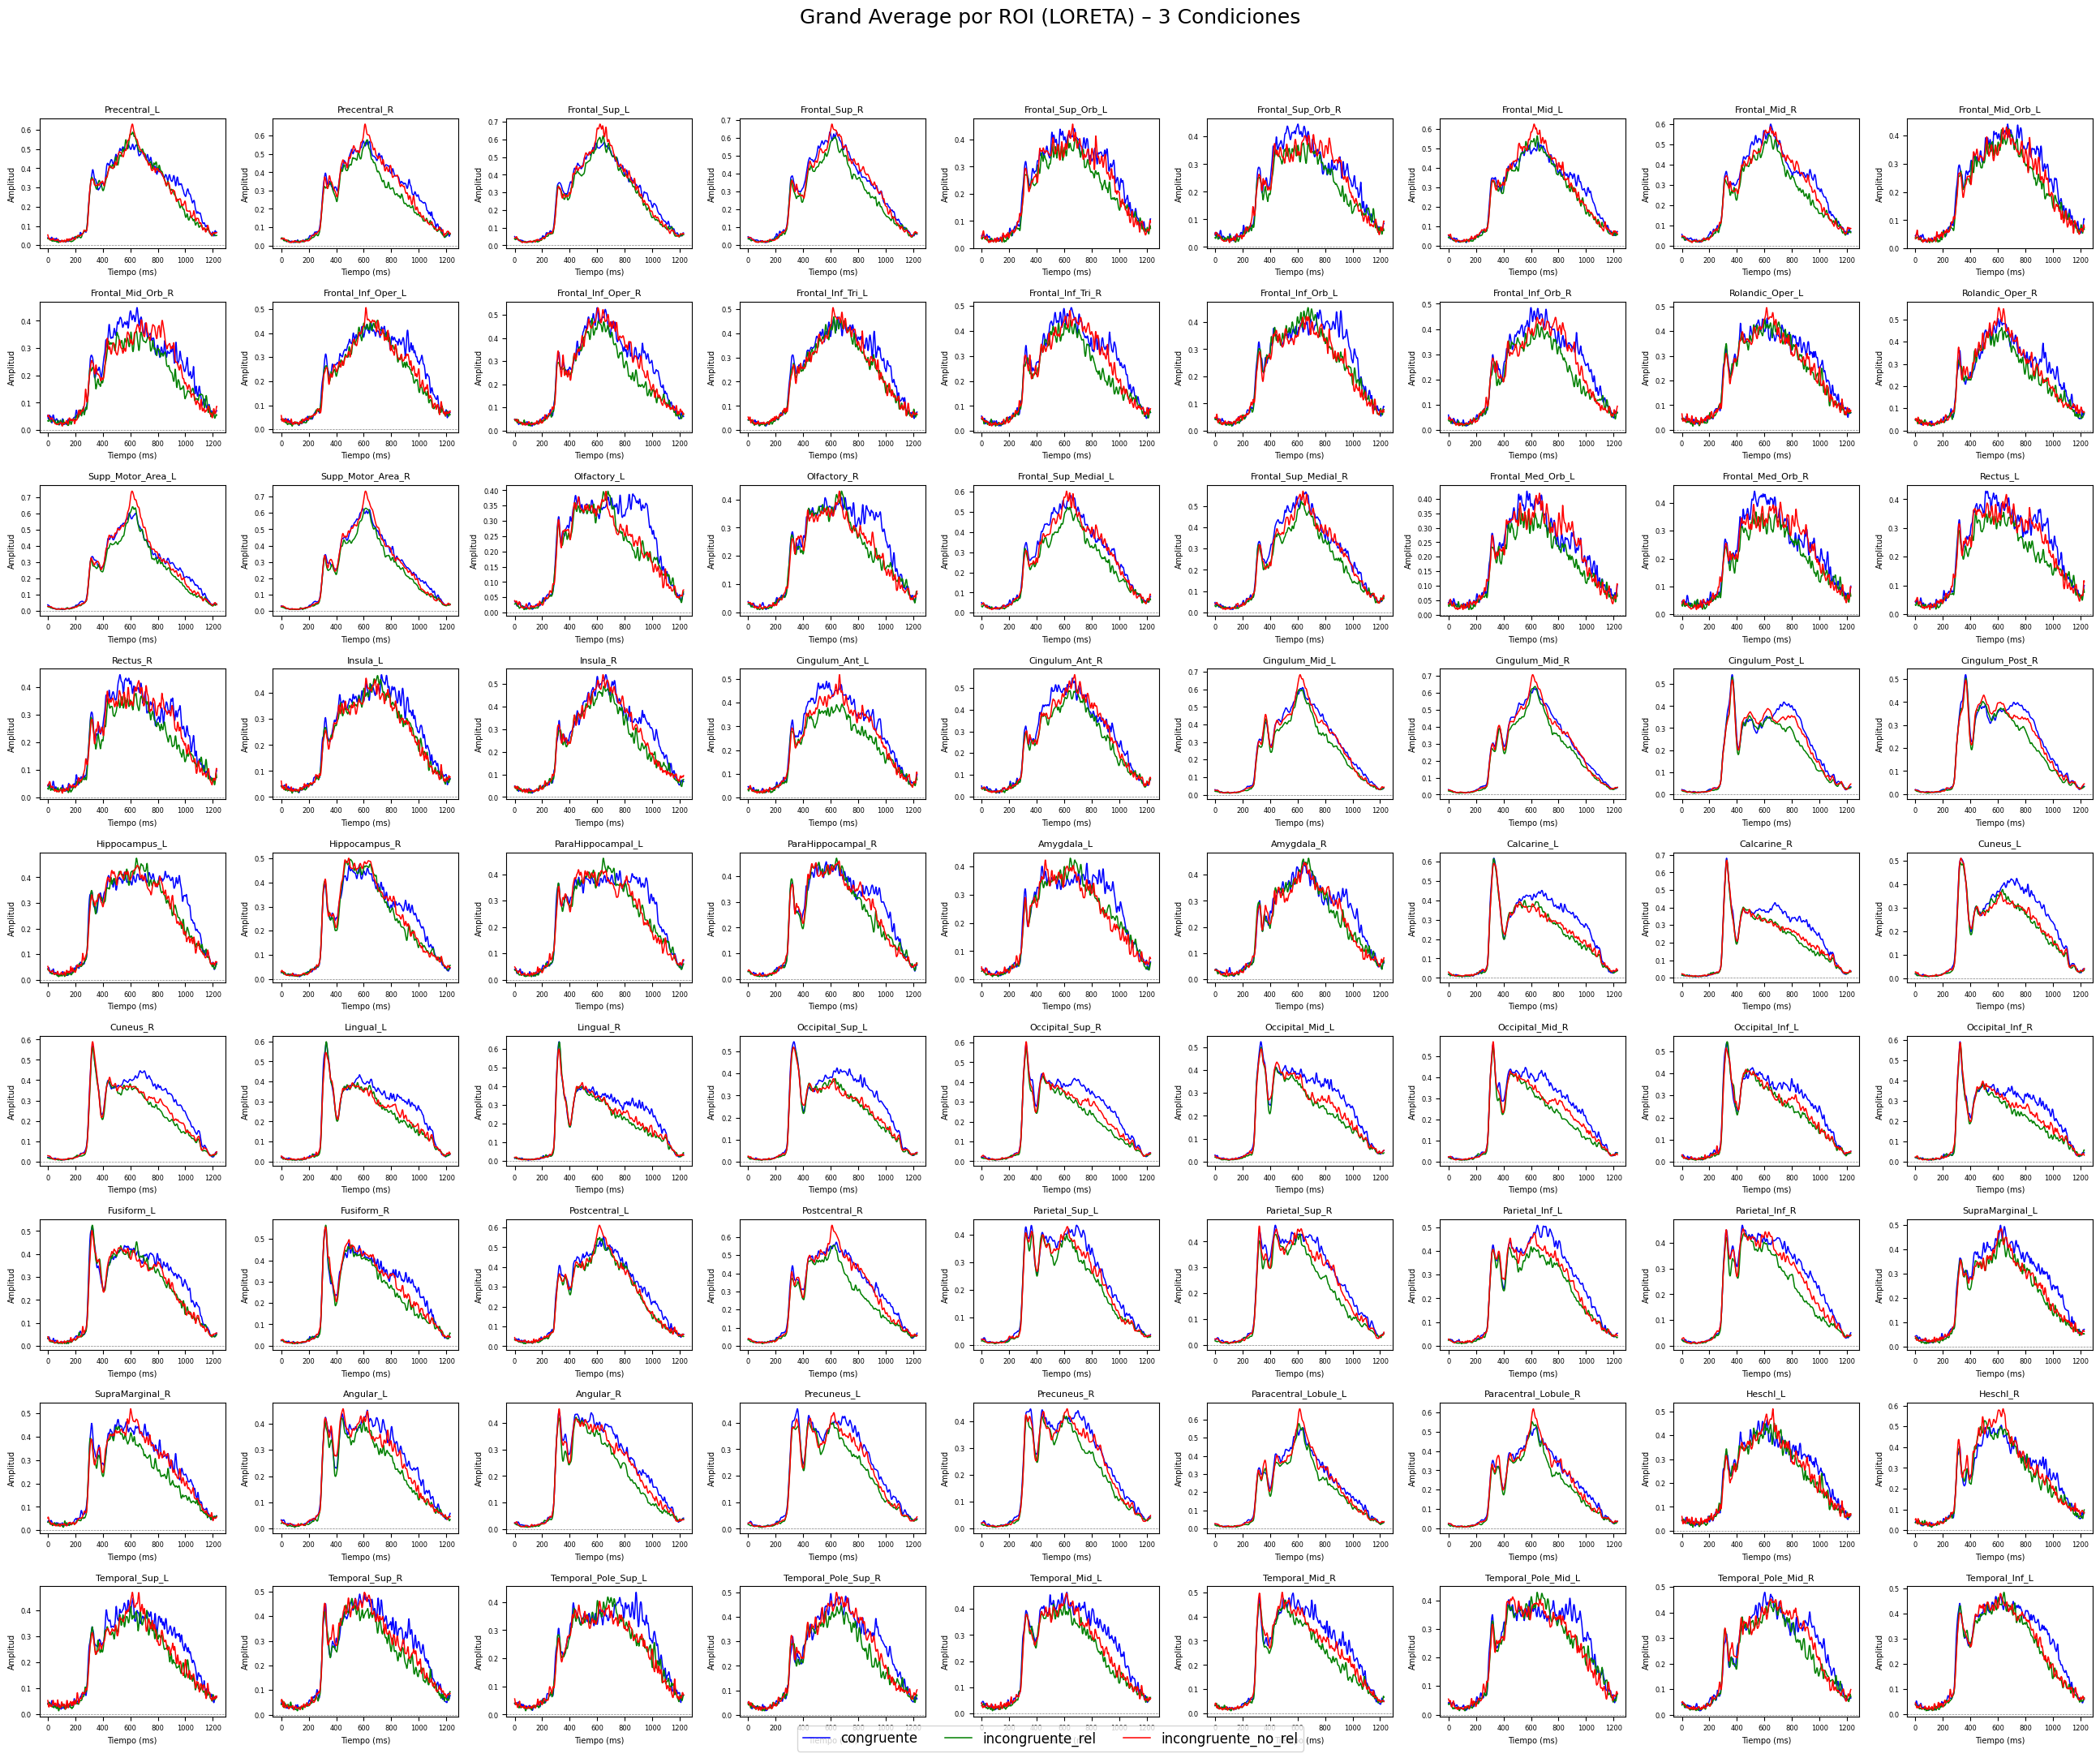

In [39]:
graficar_grand_average_rois(GA)
